In [2]:
import pandas as pd
import numpy as np

In [26]:
from sklearn.datasets import load_boston
boston = load_boston()
X = pd.DataFrame(boston.data,columns=boston.feature_names)
y = boston.target

d:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :func

## Filter 过滤式

In [6]:
# 方差大，对结果影响大
X_sample = np.array(
    [[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]
)

In [8]:
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(threshold=0.16)
vt.fit_transform(X_sample)

array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

卡方越大，差异越大

In [10]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2
iris = load_iris()
X_iris, y_iris = iris.data, iris.target
X_iris_filtered = SelectKBest(chi2,k=2).fit_transform(X_iris, y_iris)
X_iris.shape, X_iris_filtered.shape

((150, 4), (150, 2))

相关系数Pearson

In [25]:
from scipy.stats import pearsonr

In [14]:
for x in X.values.T:
    print(pearsonr(x,y))

(-0.3883046085868114, 1.1739870821941874e-19)
(0.36044534245054394, 5.713584153078143e-17)
(-0.48372516002837274, 4.90025998175163e-31)
(0.17526017719029904, 7.39062317051756e-05)
(-0.427320772373283, 7.065041586250705e-24)
(0.6953599470715388, 2.4872288710082904e-74)
(-0.376954565004596, 1.5699822091877373e-18)
(0.24992873408590385, 1.2066117273368017e-08)
(-0.3816262306397781, 5.465932569647003e-19)
(-0.46853593356776657, 5.637733627690045e-29)
(-0.5077866855375619, 1.609509478472518e-34)
(0.33346081965706625, 1.3181127340752416e-14)
(-0.7376627261740146, 5.081103394387836e-88)


In [17]:
func_pearsonr = lambda X,y: list(np.array([pearsonr(x,y) for x in X.T]).T)
X_filtered = SelectKBest(func_pearsonr, k=5).fit_transform(X.values,y)
X_filtered.shape, X.shape

((506, 5), (506, 13))

MIC 最大信息系数

In [21]:
from minepy import MINE

def get_MIC(x,y):
    m = MINE()
    m.compute_score(x,y)
    return (m.mic(),0.5)

func_mic = lambda X,y: list(np.array([get_MIC(x,y) for x in X.T]).T)
X_filtered_MIC = SelectKBest(func_mic, k=5).fit_transform(X.values,y)
X_filtered_MIC.shape, X.shape

((506, 5), (506, 13))

## Wrapped 封装式

In [22]:
from sklearn.datasets import load_diabetes
X,y = load_diabetes(return_X_y=True, as_frame=True)
n_sample = X.shape[0]

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoLarsIC
# 自动生成步骤
from sklearn.pipeline import make_pipeline

In [31]:
# aic
lasso_ars_aic = make_pipeline(
    StandardScaler(), LassoLarsIC(criterion='aic')
).fit(X,y)

lasso_ars_aic

aic_criterion = lasso_ars_aic[-1].criterion_

d:\anaconda\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [32]:
# bic
lasso_ars_bic = make_pipeline(
    StandardScaler(), LassoLarsIC(criterion='bic')
).fit(X,y)

lasso_ars_bic

bic_criterion = lasso_ars_bic[-1].criterion_

d:\anaconda\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [39]:
print(lasso_ars_bic[-1].alphas_ == lasso_ars_bic[-1].alpha_)
index_alpha_path_bic = 14

print(lasso_ars_aic[-1].alphas_ == lasso_ars_aic[-1].alpha_)
index_alpha_path_aic = 14

[False False False False False False False False False False False False
 False  True False False]
[False False False False False False False False False False False False
 False  True False False]


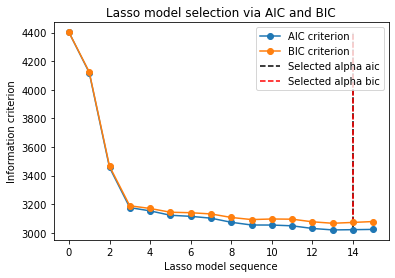

In [37]:
import matplotlib.pyplot as plt

plt.plot(aic_criterion, color="tab:blue", marker="o", label="AIC criterion")
plt.plot(bic_criterion, color="tab:orange", marker="o", label="BIC criterion")
plt.vlines(
    index_alpha_path_aic,
    aic_criterion.min(),
    aic_criterion.max(),
    color="black",
    linestyle="--",
    label="Selected alpha aic",
)
plt.vlines(
    index_alpha_path_bic,
    bic_criterion.min(),
    bic_criterion.max(),
    color="red",
    linestyle="--",
    label="Selected alpha bic",
)
plt.legend()
plt.ylabel("Information criterion")
plt.xlabel("Lasso model sequence")
_ = plt.title("Lasso model selection via AIC and BIC")

## Embedded 嵌入式

In [43]:
from sklearn.ensemble import RandomForestRegressor
tree = RandomForestRegressor(random_state=0).fit(X,y)
importances = tree.feature_importances_
indices = np.argsort(importances)